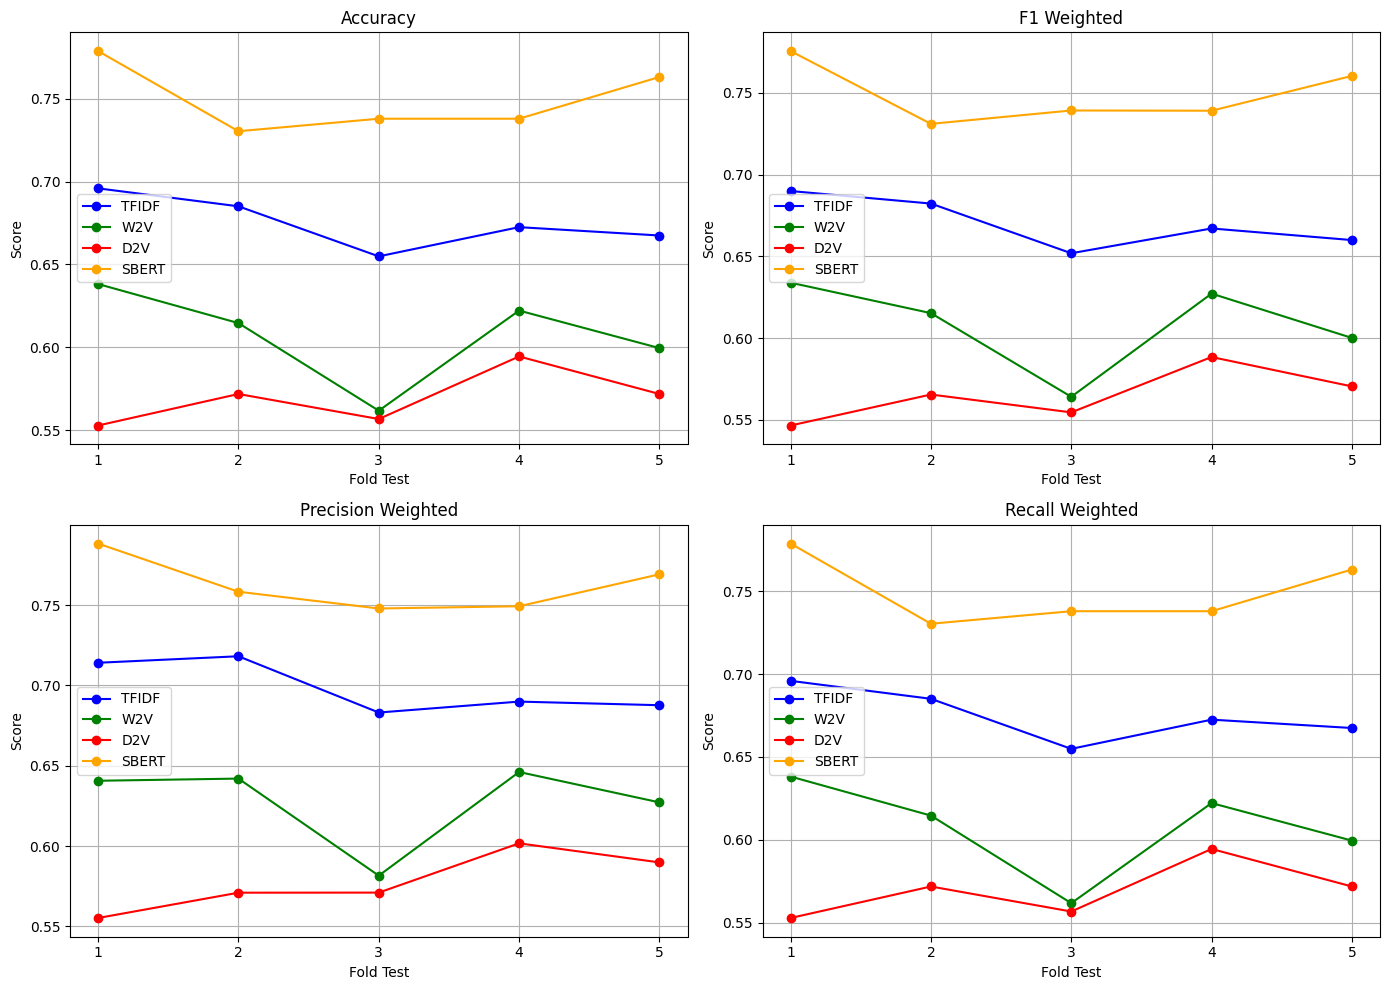

In [11]:
import json
import matplotlib.pyplot as plt

# Leggi dati dal file JSON
with open('results.json', 'r') as f:
    results = json.load(f)

# Estrai i dati di test fold per ogni feature extraction e metrica
data = {}

for feat_type in results:
    data[feat_type] = {}
    # Prendo il primo dizionario dentro la lista (assumo che ci sia solo uno)
    entry = results[feat_type]
    metrics = entry['metrics']
    for metric_name in metrics:
        # Prendo i valori dei fold di test
        data[feat_type][metric_name] = metrics[metric_name]['test']['folds']

metrics_list = ["accuracy", "f1_weighted", "precision_weighted", "recall_weighted"]
colors = {
    "TFIDF": "blue",
    "SBERT": "orange",
    "W2V": "green",
    "D2V": "red"
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics_list):
    ax = axes[i]
    for feat_type in data:
        ax.plot(range(1, len(data[feat_type][metric]) + 1), data[feat_type][metric], 
                label=feat_type, marker='o', color=colors.get(feat_type, None))
    ax.set_title(metric.replace('_', ' ').title())
    ax.set_xlabel('Fold Test')
    ax.set_ylabel('Score')
    ax.set_xticks(range(1, len(data[feat_type][metric]) + 1))
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [12]:
import json
import os

# Input and output file paths
results_file = "results.json"  # Source file with all model results
output_file = "../../classifierEvaluation.json"  # File where the best model will be saved

# Load the results from file
with open(results_file, 'r') as f:
    results = json.load(f)

# Identify the feature extraction method with the highest f1_weighted score on test set
best_model = None
best_score = -1
best_key = ""

for feature_type, runs in results.items():
    # Assume only one run per feature type (index 0)
    f1_test_mean = runs["metrics"]["f1_weighted"]["test"]["mean"]
    if f1_test_mean > best_score:
        best_score = f1_test_mean
        best_model = runs
        best_key = feature_type

section_key = "SVM_" + best_key 

# Load or initialize the output JSON structure
if os.path.exists(output_file):
    with open(output_file, 'r') as f:
        data = json.load(f)
else:
    data = {}

# Ensure the section exists
if section_key not in data:
    data[section_key] = []

# Append the new best model to the section
data[section_key].append(best_model)

# Write the updated data back to file
with open(output_file, 'w') as f:
    json.dump(data, f, indent=4)

print(f"Saved the best model")

Saved the best model
